In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

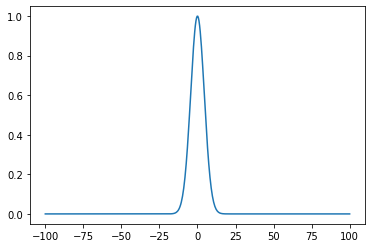

In [8]:
x = np.linspace(-100,100,500)
wavefunction = np.exp(-x**2/(2*20))
plt.plot(x,wavefunction)
plt.xlabel("Width")
plt.ylabel("Wavefunction")
plt.show()

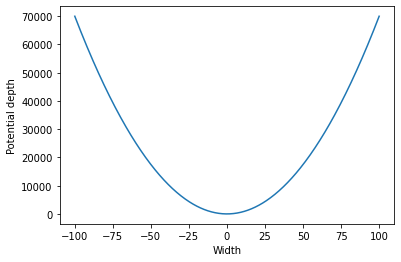

In [20]:
m = 7
omega = 1
potential = m*omega**2*x**2
plt.plot(x,potential)
plt.xlabel("Width")
plt.ylabel("Potential depth")
plt.show()